In [226]:
import os
import pandas as pd

INPUT_FILE = "mushrooms.csv"

def load_data(file=INPUT_FILE, header=True):
    csv_path = os.path.join("", file)
    if header:
        return pd.read_csv(csv_path)
    else:
        return pd.read_csv(csv_path, header=None)


data = load_data(INPUT_FILE)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [228]:
datacopy = data.copy()

In [229]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

encoders = {}
binarizers = {}
for column in list(data):
    encoder = LabelEncoder()
    encoder.fit(data[column])
    binarizer = LabelBinarizer()
    binarizer.fit(data[column])
    data[column] = encoder.transform(data[column])
    encoders[column] = encoder
    binarizers[column] = binarizer

In [230]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


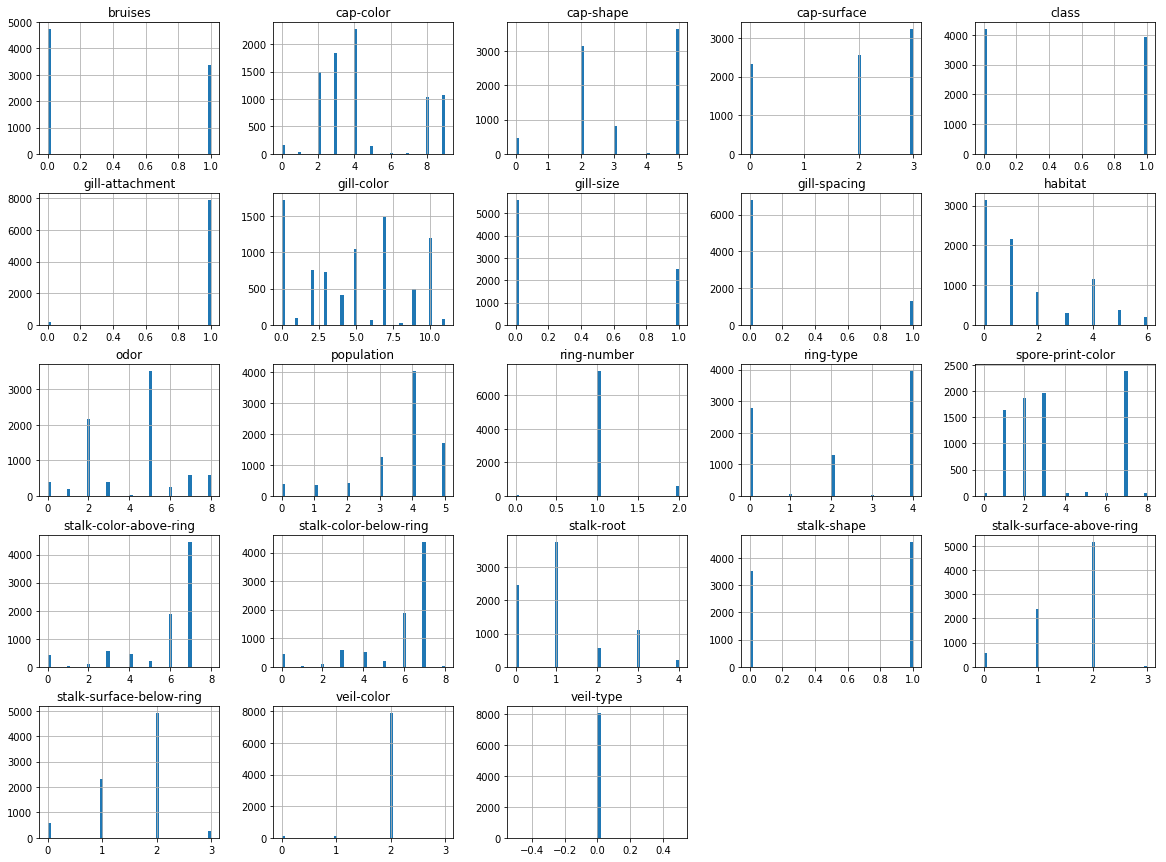

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [232]:
corr_features = data.corr()
corr_features["class"]

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

In [233]:
columns_removed = []
columns_removed.append("veil-type")

In [234]:
data = datacopy.copy()

In [235]:
from sklearn .model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(data, data["class"]):
    train_features = data.loc[train_index]
    test_features = data.loc[test_index]
    
train_labels = train_features["class"].copy().values
train_features.drop("class", axis=1, inplace=True)

test_labels = test_features["class"].copy().values
test_features.drop("class", axis=1, inplace=True)

In [236]:
for set in (train_features, test_features):
    for column_removed in columns_removed:
        set.drop([column_removed], axis=1, inplace=True)

In [237]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6093 entries, 6345 to 4879
Data columns (total 21 columns):
cap-shape                   6093 non-null object
cap-surface                 6093 non-null object
cap-color                   6093 non-null object
bruises                     6093 non-null object
odor                        6093 non-null object
gill-attachment             6093 non-null object
gill-spacing                6093 non-null object
gill-size                   6093 non-null object
gill-color                  6093 non-null object
stalk-shape                 6093 non-null object
stalk-root                  6093 non-null object
stalk-surface-above-ring    6093 non-null object
stalk-surface-below-ring    6093 non-null object
stalk-color-above-ring      6093 non-null object
stalk-color-below-ring      6093 non-null object
veil-color                  6093 non-null object
ring-number                 6093 non-null object
ring-type                   6093 non-null object
spore-pr

In [252]:
import numpy as np

X = []
X_test = []
for column in list(train_features):
    if len(X) == 0:
        X = binarizers[column].transform(train_features[column])
        X_test = binarizers[column].transform(test_features[column])
        continue
        
    X = np.concatenate((X, binarizers[column].transform(train_features[column])), axis=1)
    X_test = np.concatenate((X_test, binarizers[column].transform(test_features[column])), axis=1)
    
Y = binarizers["class"].transform(train_labels)
Y_test = binarizers["class"].transform(test_labels)

In [253]:
print(np.shape(Y), np.shape(Y_test), np.shape(X), np.shape(X_test))

(6093, 1) (2031, 1) (6093, 111) (2031, 111)


In [324]:
from sklearn.decomposition import PCA

dims = []
variances = []
temp = 0
for dim in range(2, 25):
    pca = PCA(n_components=dim)
    pca.fit(X)
    variance = np.array(pca.explained_variance_ratio_)
    variance = variance.min()
    dims.append(dim)
    if temp == 0:
        variances.append(variance)
        temp = variance
        continue
        
    variances.append(temp - variance)
    temp = variance

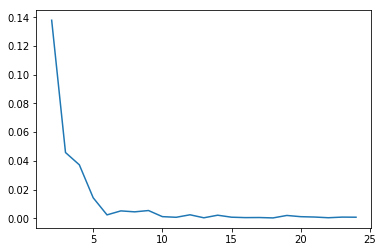

In [325]:
import matplotlib.pyplot as plt
plt.plot(dims, variances)
plt.show()

In [326]:
variances

[0.13796347866059167,
 0.04577941310440363,
 0.03720226298086741,
 0.014256837138483358,
 0.00231285777482116,
 0.005098657241279517,
 0.0044293468111793535,
 0.005344978089756376,
 0.001096320264188884,
 0.0006374809337837961,
 0.0023791344286316143,
 0.00028817033600408645,
 0.0020885456444741345,
 0.0006994412863846472,
 0.0004113321820303148,
 0.00047347122576895696,
 0.0001996660250951337,
 0.0019186509462209376,
 0.0010618255926914538,
 0.0008101018204923396,
 0.0003244460267858608,
 0.0007651353353830964,
 0.0006890572504506878]

In [327]:
DIMENSION = 20

In [328]:
pca = PCA(n_components=DIMENSION)
pca.fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)